In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [9]:
tickers = ['MSFT', 'PG', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6333 entries, 1995-01-03 to 2020-02-27
Data columns (total 3 columns):
MSFT    6333 non-null float64
PG      6333 non-null float64
GE      6333 non-null float64
dtypes: float64(3)
memory usage: 197.9 KB


In [11]:
mydata.head()

,MSFT,PG,GE
Date,,,
1995-01-03,2.413537,6.362394,2.731941
1995-01-04,2.431082,6.311395,2.731941
1995-01-05,2.390982,6.222139,2.738635
1995-01-06,2.431082,6.234891,2.725244
1995-01-09,2.416045,6.209391,2.698461


In [6]:
mydata.tail()

,MSFT,BAH,GE
Date,,,
2020-02-21,178.589996,73.139999,12.250
2020-02-24,170.889999,72.169998,11.860
2020-02-25,168.070007,70.470001,11.320
2020-02-26,170.169998,71.910004,10.950
2020-02-27,162.638107,71.510002,10.655


In [12]:
# get first row
mydata.iloc[0]

MSFT    2.413537
PG      6.362394
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

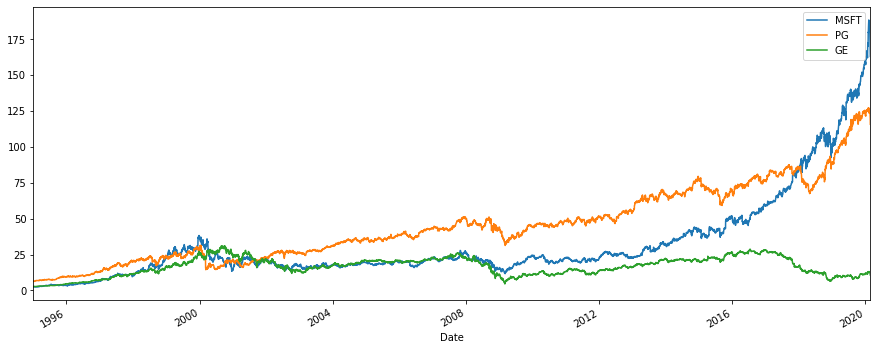

In [14]:
# without normalize
mydata.plot(figsize=(15,6))
plt.show()

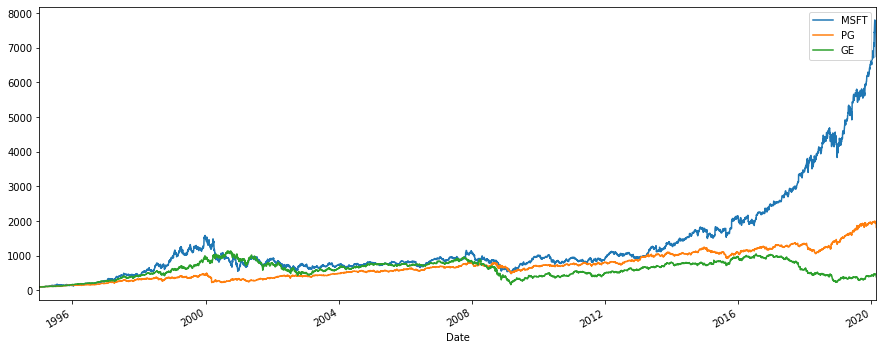

In [13]:
#  Normalize to 100
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

In [15]:
mydata.loc['1995-01-03']

MSFT    2.413537
PG      6.362394
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

In [16]:
mydata.iloc[0]

MSFT    2.413537
PG      6.362394
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

In [17]:
returns = (mydata / mydata.shift(1)-1 )
returns.head()

,MSFT,PG,GE
Date,,,
1995-01-03,NaN,NaN,NaN
1995-01-04,0.007269,-0.008016,0.000000
1995-01-05,-0.016495,-0.014142,0.002450
1995-01-06,0.016771,0.002049,-0.004890
1995-01-09,-0.006185,-0.004090,-0.009828


In [19]:
# apply weights
weights = np.array([0.25, 0.25, 0.25])
np.dot(returns, weights)

array([        nan, -0.00018662, -0.00704658, ..., -0.01929982,
       -0.00766236, -0.02657248])

In [21]:
annual_returns = returns.mean() * 250
annual_returns

MSFT    0.214396
PG      0.139041
GE      0.099740
dtype: float64

In [24]:
pf1 = str(round(np.dot(annual_returns, weights),5) *100) + ' %'
print(pf1)

11.329 %
